In [34]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [35]:
df = pd.read_csv('transaction_data.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [37]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

In [38]:
df.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [39]:
df.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [40]:
transaction_count = df.groupby('transaction', as_index=False).agg({'date' : 'count'})

In [41]:
transaction_count.sort_values('date', ascending=False)

,transaction,date
2,successfull,3692
0,cancelled,1619
1,error,4


<AxesSubplot:xlabel='transaction', ylabel='date'>

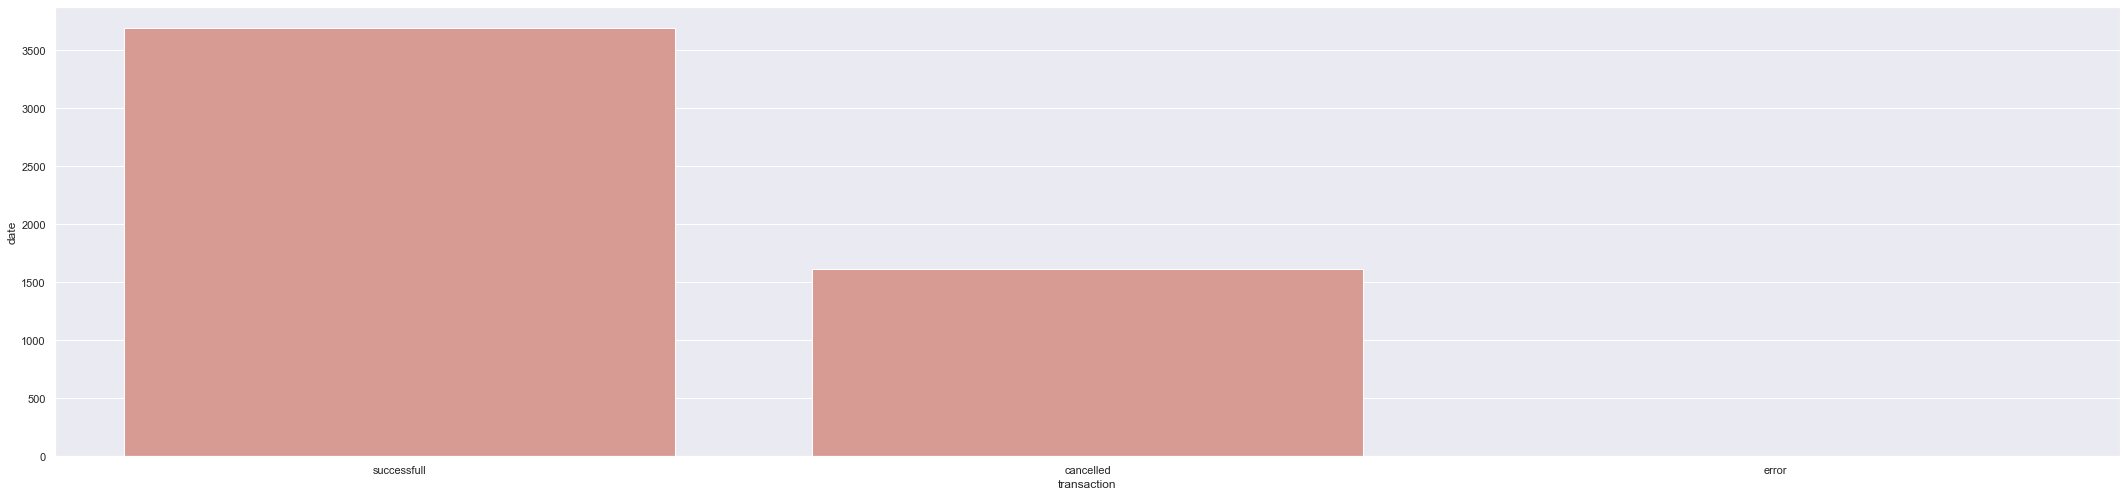

In [42]:
sns.barplot(x='transaction', y='date', data=transaction_count.sort_values('date', ascending=False), color="salmon", saturation=.5)

Сколько произошло ошибок? 

In [43]:

transaction_count.loc[(transaction_count['transaction'] == 'error')]

,transaction,date
1,error,4


In [44]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

In [45]:
count_of_transaction = df.query('transaction == "successfull"') \
    .groupby('name', as_index=False) \
    .agg({'date' : 'count'}) \
    .rename(columns={'date' : 'count_of_transaction'})

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

по оси x – число транзакций
по оси y – доля пользователей с таким числом транзакций

In [46]:
count_of_transaction.describe()

,count_of_transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [47]:
count_of_transaction.head()

,name,count_of_transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


c:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count_of_transaction', ylabel='Density'>

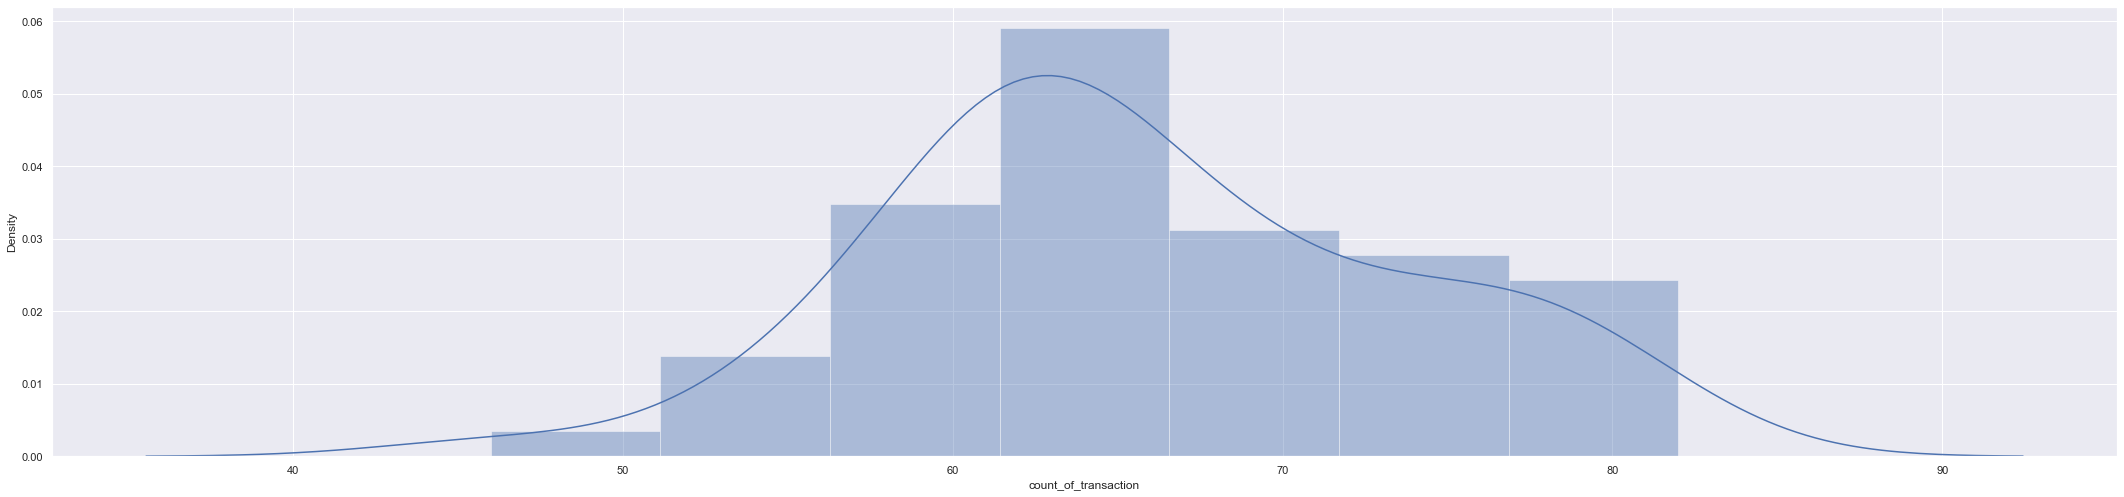

In [48]:
sns.distplot(count_of_transaction.count_of_transaction)

К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

столбцы – имена пользователей
строки – минута времени осуществления операции (minute)
значения – число совершённых операций
Пропущенные значения заполните нулями.

In [49]:
df_updated = pd.read_csv('transaction_data_updated.csv', parse_dates=['date'])

In [50]:
df_updated.head(5)

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [51]:
df_updated.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [52]:
grouped_by_name_n_min = df_updated.groupby(['name',  'minute'], as_index=False).agg({'date' : 'count'}) \
  .rename(columns={"date": "count_of_operations"})

In [53]:
grouped_by_name_n_min.head()

,name,minute,count_of_operations
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [54]:
pivot = grouped_by_name_n_min.pivot(index='minute', columns='name', values='count_of_operations').fillna(0)

In [55]:
pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


Коллега построил следующий график по сводной таблице из предыдущего шага, и сомневается, что в данных нет ошибки. 

по оси x – минута транзакции (сколько минут прошло с начала дня)
по оси y – число транзакций

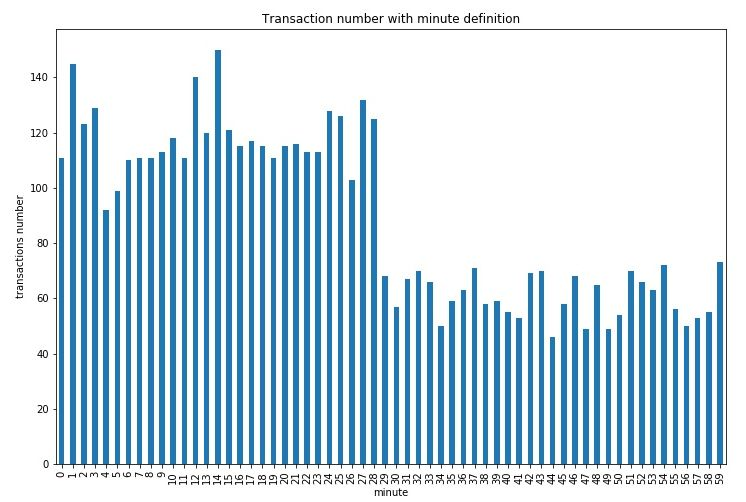  
Как вы думаете, из-за чего мы видим такую картину? Произошла ошибка, или с данными всё хорошо?

In [56]:
df_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


!!! <b>Извлекли минутную часть времени</b>, а не число минут с начала дня.  
добавим колонку с корректным подсчетом минут

In [57]:
df_updated['true_minute'] = df_updated.date.dt.minute + df_updated.date.dt.hour * 60

In [58]:
gr = df_updated.groupby(['name',  'true_minute'], as_index=False).agg({'date' : 'count'}).rename(columns={'date' : 'count'})

In [59]:
gr.head()

,name,true_minute,count
0,Ekaterina_Fedorova,0,1
1,Ekaterina_Fedorova,1,1
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,2
4,Ekaterina_Fedorova,4,2


строим график с "корректными" минутами

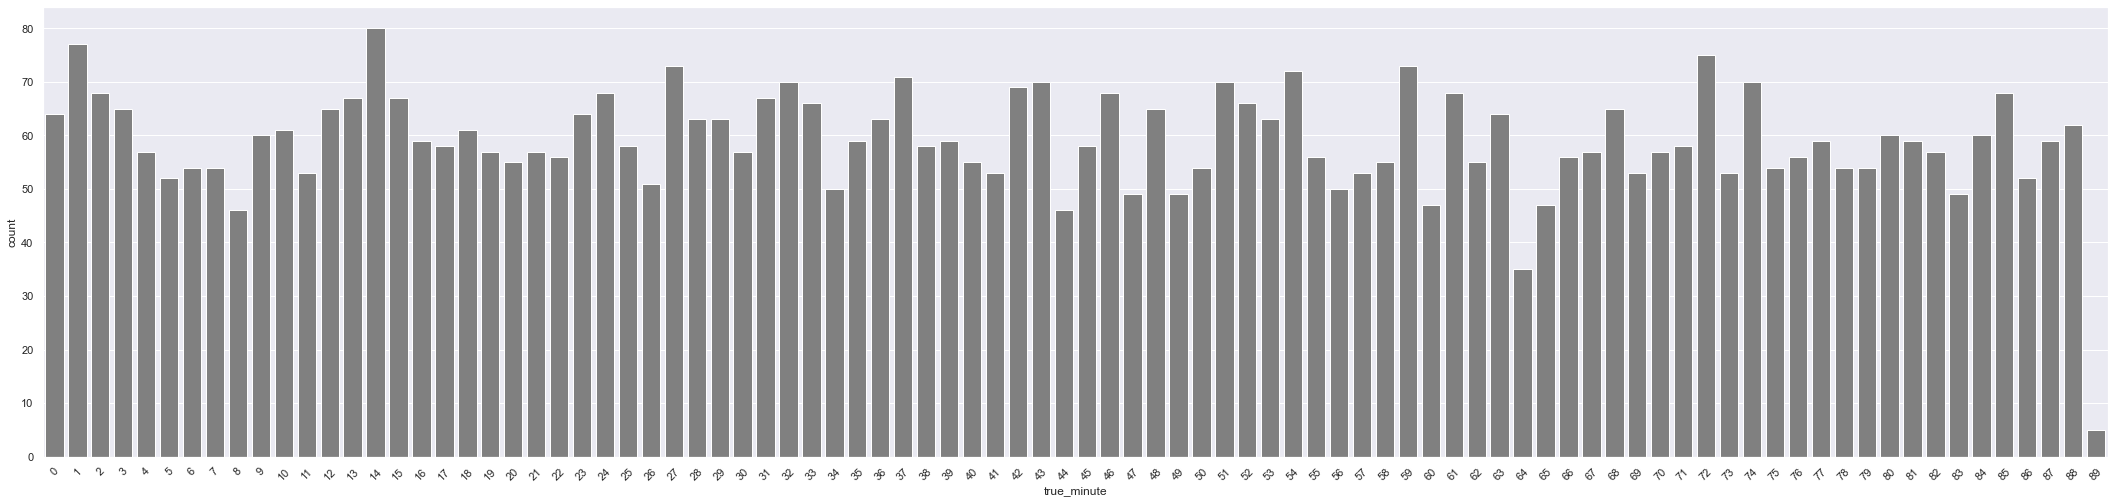

In [60]:
sns.countplot(x='true_minute', data=df_updated, color="grey")
sns.set(rc={'figure.figsize':(37,8.27)})
plt.xticks(rotation=45)
plt.show()